几乎所有的参数、接口、属性都和回归树一样。需要注意的是在回归树中没有标签是否均衡的问题，因此没有class_weight这样的参数。

从分类变为回归问题，criterion的参数也改变：回归树一般用
* MSE均方误差(父节点和子节点均方误差的差值作为特征选择的标准)，这种方法通过使用叶子节点的均值来最小化L2损失
* friedman_mse费尔德曼MSE，这个指标使用弗里德曼针对潜在分支中的问题改进后的均方误差
* MAE，这种指标使用叶子节点的中值来最小化L1损失

在回归树中，MSE不仅是分支衡量指标，也是常用的衡量回归树回归质量的指标。然而，回归树接口的score返回的是R方，而不是MSE。
* 为什么呢？因为使用均方误差作为衡量指标的情况下，很容易造成模型冗余和过拟合
* R方返回的值范围是(-无穷, 1]，当结果为0时，相当于简单预测模型中所有值为均值，当结果为负，意味着模型比简单预测所有值为均值还要糟糕，而均方误差永远为正

**交叉验证**

In [5]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor

In [6]:
housing = fetch_california_housing()
housing

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [9]:
housing = fetch_california_housing()
regressor = DecisionTreeRegressor(random_state=0)
cross_val_score(regressor, housing.data, housing.target, cv=10
                ,scoring='neg_mean_squared_error'
               )
# 返回每次交叉计算的结果

array([-1.30551334, -0.78405711, -0.72809865, -0.50413232, -0.79683323,
       -0.83698199, -0.56591889, -1.03621067, -1.02786488, -0.51371889])

默认情况下，scoring默认返回的是R方，可以指定使用MSE

**实例：一维回归曲线**

In [10]:
import numpy as np
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt

+ **先创建一条需要回归的曲线**

In [18]:
rng= np.random.RandomState(1)  # 随机数种子
X = np.sort(5 * rng.rand(80,1), axis=0)  # 由于sklearn的各种模型不接受一维的数据作为输入，所以这里生成为这种形式
y = np.sin(X).ravel()  # 生成正弦曲线，y压缩

In [21]:
y[::5] += 3 * (0.5 - rng.rand(16))  # 添加扰动

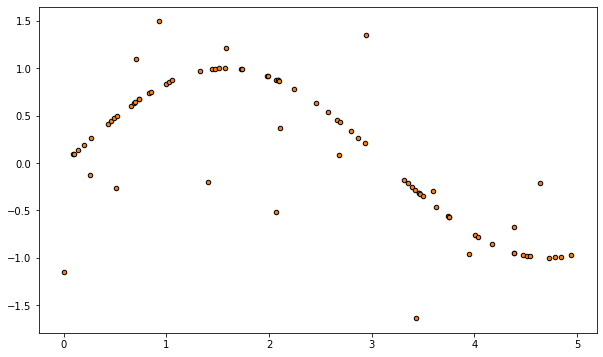

In [31]:
fig, ax = plt.subplots(figsize=(10,6))

ax.scatter(X, y, s=20, c='#ff7f0e', edgecolors='black')

plt.show()

+ **实例化以及训练模型**

建立两个模型了解在不同的模型下，回归树如何表现

In [33]:
regr_1 = DecisionTreeRegressor(max_depth=2)
regr_2 = DecisionTreeRegressor(max_depth=5)
regr_1.fit(X, y)
regr_2.fit(X, y)

DecisionTreeRegressor(max_depth=5)

+ **导入测试集**

In [41]:
X_test = np.arange(0, 5, 0.01)[:, np.newaxis]

In [35]:
# 了解一下np.newaxis功能，用于增维
l = np.array([1,2,3,4])
l
l.shape
l[:, np.newaxis]
l[:, np.newaxis].shape
l[np.newaxis,:].shape

array([1, 2, 3, 4])

In [42]:
y_1 = regr_1.predict(X_test)
y_2 = regr_2.predict(X_test)

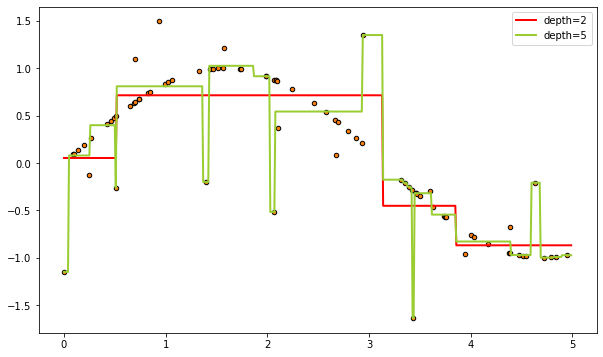

In [48]:
fig, ax = plt.subplots(figsize=(10,6))

ax.scatter(X, y, s=20, c='#ff7f0e', edgecolors='black')
ax.plot(X_test, y_1, c='red', label='depth=2', linewidth=2)
ax.plot(X_test, y_2, c='yellowgreen', label='depth=5', linewidth=2)
axx.set_title('Decision Tree Regreesor')
              
plt.legend()
plt.show()

(4, 1)

(1, 4)